In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt



In [38]:
vertical_filter = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

horizontal_filter = vertical_filter.T


In [39]:
img = plt.imread("aircraft.jpg")

n, m, d = img.shape

In [40]:
edges_img = img.copy()

In [43]:
def edge_detection(img):
    edges_img = img.copy()

    for row in range(3, n-2):
        for col in range(3, m-2):

            local_pixels = img[row-1:row+2, col-1:col+2, 0]


            vertical_transformed_pixels = vertical_filter*local_pixels
            vertical_score = vertical_transformed_pixels.sum()/4


            horizontal_transformed_pixels = horizontal_filter*local_pixels
            horizontal_score = horizontal_transformed_pixels.sum()/4

            edge_score = (vertical_score**2 + horizontal_score**2)**.5


            edges_img[row, col] = [edge_score]*3

    edges_img = edges_img/edges_img.max()
    return edges_img

In [44]:
edges_img = edge_detection(img)

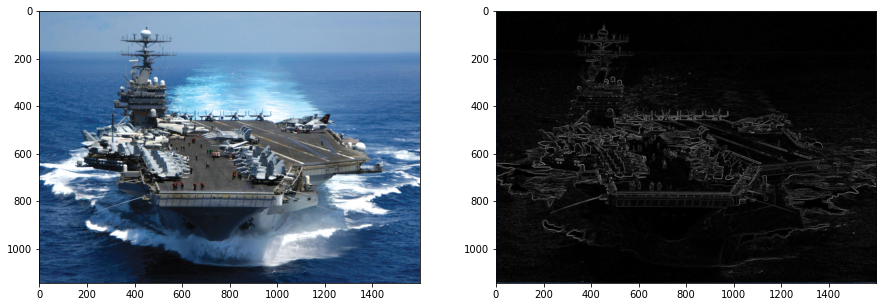

In [45]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(edges_img, cmap="gray")

